<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

<a id="ref1"></a>
### What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

In [89]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing # To normalize the data
from sklearn.model_selection import train_test_split # To create Train and Test datasets
from sklearn.linear_model import LogisticRegression # To build the Logistic Regression model and predict
from sklearn.metrics import jaccard_similarity_score # To compute the jaccard index for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss # Calculate log-loss
# The below two statements are to ensure that all print commands in a cell give outputs, not only the last print command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [7]:
# Load the customer churn data from S3 blob storage
!curl https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv -O ChurnData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 36144  100 36144    0     0   121k      0 --:--:-- --:--:-- --:--:--  122k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [21]:
# Examine the data

churn_df.shape # get the size of the data, i.e number of rows and number of columns
churn_df.columns # get list of columns
churn_df.head(10) # To eyeball the first ten rows
churn_df.describe() # Get summary statistics
churn_df.corr() # Get the correlation matrix of the data
# Get a heatmap representation of the correlation matrix
churn_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2) # limit number of precision digits after decimal

(200, 28)

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590,0.763134,...,0.018791,-0.164921,-0.009747,0.080650,-0.099128,0.864388,0.310045,0.246353,0.134237,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527,0.373547,...,0.006803,-0.078395,0.020002,0.030625,-0.048279,0.379413,0.093600,0.313359,0.041055,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478,0.421782,...,-0.105812,-0.191058,-0.019967,-0.030494,-0.172171,0.409357,0.018386,0.212929,-0.016841,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635,0.041808,...,0.056977,0.102809,0.081133,-0.031556,-0.041392,0.065595,-0.156498,0.680313,0.030725,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670,-0.072735,...,0.258698,0.552996,-0.016247,-0.132215,0.427315,-0.054581,-0.007227,0.206718,0.013127,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187,0.363386,...,0.038381,-0.250044,0.119708,0.173247,-0.151965,0.377186,0.068718,0.540052,0.131292,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735,-0.097618,...,0.308633,0.623509,-0.034021,-0.103499,0.603133,-0.113065,-0.027882,0.083494,0.174955,0.275284
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118,0.322514,...,0.251069,-0.067146,0.370878,0.311056,-0.045058,0.351030,0.080060,0.156920,0.407553,-0.311451
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000,-0.073043,...,0.667535,0.343631,0.389670,0.382925,0.321433,-0.042637,0.178317,0.033558,0.598156,0.174356
longmon,0.763134,0.373547,0.421782,0.041808,-0.072735,0.363386,-0.097618,0.322514,-0.073043,1.000000,...,-0.001372,-0.223929,0.032913,0.060614,-0.124605,0.901631,0.247302,0.122550,0.072519,-0.292026


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,1.00,0.43,0.46,0.11,-0.07,0.45,-0.12,0.43,-0.07,0.76,0.10,-0.04,0.49,0.04,0.80,0.40,0.68,-0.05,0.02,-0.16,-0.01,0.08,-0.10,0.86,0.31,0.25,0.13,-0.38
age,0.43,1.00,0.75,0.21,-0.07,0.62,-0.07,0.17,-0.07,0.37,0.05,-0.03,0.20,-0.00,0.39,0.19,0.34,0.02,0.01,-0.08,0.02,0.03,-0.05,0.38,0.09,0.31,0.04,-0.29
address,0.46,0.75,1.00,0.13,-0.15,0.52,-0.15,0.21,-0.15,0.42,-0.02,-0.13,0.30,-0.11,0.45,0.13,0.41,-0.07,-0.11,-0.19,-0.02,-0.03,-0.17,0.41,0.02,0.21,-0.02,-0.26
income,0.11,0.21,0.13,1.00,0.14,0.35,-0.01,-0.02,-0.03,0.04,-0.00,0.00,-0.01,-0.03,0.05,-0.00,0.02,0.09,0.06,0.10,0.08,-0.03,-0.04,0.07,-0.16,0.68,0.03,-0.09
ed,-0.07,-0.07,-0.15,0.14,1.00,-0.21,0.49,-0.07,0.27,-0.07,-0.00,0.49,-0.07,0.29,-0.08,-0.02,-0.07,0.23,0.26,0.55,-0.02,-0.13,0.43,-0.05,-0.01,0.21,0.01,0.22
employ,0.45,0.62,0.52,0.35,-0.21,1.00,-0.17,0.27,-0.10,0.36,0.12,-0.14,0.22,-0.05,0.39,0.24,0.31,-0.04,0.04,-0.25,0.12,0.17,-0.15,0.38,0.07,0.54,0.13,-0.34
equip,-0.12,-0.07,-0.15,-0.01,0.49,-0.17,1.00,-0.09,0.39,-0.10,-0.09,0.94,-0.06,0.37,-0.10,-0.10,-0.05,0.26,0.31,0.62,-0.03,-0.10,0.60,-0.11,-0.03,0.08,0.17,0.28
callcard,0.43,0.17,0.21,-0.02,-0.07,0.27,-0.09,1.00,0.22,0.32,0.35,0.03,0.63,0.26,0.34,0.29,0.45,0.23,0.25,-0.07,0.37,0.31,-0.05,0.35,0.08,0.16,0.41,-0.31
wireless,-0.07,-0.07,-0.15,-0.03,0.27,-0.10,0.39,0.22,1.00,-0.07,0.46,0.53,0.20,0.89,-0.09,0.33,0.05,0.65,0.67,0.34,0.39,0.38,0.32,-0.04,0.18,0.03,0.60,0.17
longmon,0.76,0.37,0.42,0.04,-0.07,0.36,-0.10,0.32,-0.07,1.00,0.08,-0.07,0.49,-0.02,0.98,0.34,0.67,-0.08,-0.00,-0.22,0.03,0.06,-0.12,0.90,0.25,0.12,0.07,-0.29


In [8]:
# Read the data into a dataframe

churn_df = pd.read_csv('ChurnData.csv')

In [23]:
# Data Pre-processing and Feature Selection

churn_df_feature = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df_target = churn_df['churn'].astype('int')
churn_df_feature.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [25]:
# Examine the feature dataset

churn_df_feature.shape # get the size of the data, i.e number of rows and number of columns
churn_df_feature.columns # get list of columns
churn_df_feature.head(10) # To eyeball the first ten rows
churn_df_feature.describe() # Get summary statistics
churn_df_feature.corr() # Get the correlation matrix of the data
# Get a heatmap representation of the correlation matrix
churn_df_feature.corr().style.background_gradient(cmap='coolwarm').set_precision(2) # limit number of precision digits after decimal

(200, 10)

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,0.0


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,1.000000


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735,0.275284
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118,-0.311451
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000,0.174356
churn,-0.376860,-0.287697,-0.260659,-0.090790,0.216112,-0.337969,0.275284,-0.311451,0.174356,1.000000


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
tenure,1.00,0.43,0.46,0.11,-0.07,0.45,-0.12,0.43,-0.07,-0.38
age,0.43,1.00,0.75,0.21,-0.07,0.62,-0.07,0.17,-0.07,-0.29
address,0.46,0.75,1.00,0.13,-0.15,0.52,-0.15,0.21,-0.15,-0.26
income,0.11,0.21,0.13,1.00,0.14,0.35,-0.01,-0.02,-0.03,-0.09
ed,-0.07,-0.07,-0.15,0.14,1.00,-0.21,0.49,-0.07,0.27,0.22
employ,0.45,0.62,0.52,0.35,-0.21,1.00,-0.17,0.27,-0.10,-0.34
equip,-0.12,-0.07,-0.15,-0.01,0.49,-0.17,1.00,-0.09,0.39,0.28
callcard,0.43,0.17,0.21,-0.02,-0.07,0.27,-0.09,1.00,0.22,-0.31
wireless,-0.07,-0.07,-0.15,-0.03,0.27,-0.10,0.39,0.22,1.00,0.17
churn,-0.38,-0.29,-0.26,-0.09,0.22,-0.34,0.28,-0.31,0.17,1.00


In [27]:
# Define X and y as

X = np.asarray(churn_df_feature[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df_feature['churn'])
X[0:6]
y[0:6]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.],
       [ 68.,  52.,  17., 120.,   1.,  24.,   0.]])

array([1., 1., 0., 0., 0., 0.])

In [28]:
# Normalize the dataset, i.e. normalize X

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:6]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695],
       [ 1.505318  ,  0.83064562,  0.52797838,  0.35024865, -1.42318853,
         1.54168853, -0.85972695]])

In [45]:
# Create Train and Test Data

# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


numpy.ndarray

### Modeling

Build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 

In [34]:
# Using LogisticRegression() function to fit a logistic regression model to the Train dataset

# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Predict using LR on the test set

yhat = LR.predict(X_test)
len(yhat)
type(yhat)
yhat

40

numpy.ndarray

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0.])

In [57]:
# Predict probabilities
# returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of 
# class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

yhat_proba = LR.predict_proba(X_test)
len(yhat_proba)
type(yhat_proba)
yhat_proba.shape
yhat_proba

40

numpy.ndarray

(40, 2)

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

In [73]:
for i in range(0, len(yhat_proba)):
    print(yhat_proba[i][0])

0.5413291925872998
0.6059335666085934
0.5627771319149106
0.6343248893661775
0.5643183898176465
0.5538664569149677
0.5223720730519095
0.6051434856619091
0.4106957208388251
0.6333873027988037
0.5806879116217882
0.6276862837867687
0.47559882516602925
0.4267593003657706
0.6617241720923162
0.5509231543528036
0.5174994626198184
0.48574300435368944
0.49011451265324835
0.5242334888671121
0.6161951867265195
0.52696301697772
0.639571683883321
0.5220516408266951
0.5057285150667723
0.707062021168607
0.5526628641233959
0.5227159404200079
0.5163886275167322
0.7133139057650311
0.6786211149524104
0.5089640291431827
0.42348082225498307
0.7149583838596467
0.5971106441100222
0.6380883872870684
0.39957895351179173
0.5212763782069884
0.6597546356956652
0.5114172007191718


### Combine lists: y_test, yhat and yhat_proba into one dictionary

In [64]:
# First onvert y_test, yhat, and yhat_proba into lists
# Check the datatypes, because depending upon whether the datatype is a series or a numpy array, slightly different
# syntaxes to convert to list should be used
type(y_test)
type(yhat)
type(yhat_proba)
# testy = y_test.values.tolist()
# predy = yhat.values.tolist()
# probapredy = yhat_proba.values.tolist()
testy = np.array(y_test).tolist()
predy = np.array(yhat).tolist()
probapredy = np.array(yhat_proba).tolist()

numpy.ndarray

numpy.ndarray

numpy.ndarray

In [50]:
# Create a dictionary with all three lists above
dict = {'y': testy, 'yhat': predy, 'yhat_proba': probapredy}
# Convert the dictionary into a dataframe
yyhatproba = pd.DataFrame(dict)
yyhatproba.shape, yyhatproba.head(10)

((40, 3),
      y  yhat                                 yhat_proba
 0  0.0   0.0  [0.5413291925872998, 0.45867080741270017]
 1  0.0   0.0  [0.6059335666085934, 0.39406643339140657]
 2  1.0   0.0   [0.5627771319149106, 0.4372228680850894]
 3  0.0   0.0   [0.6343248893661775, 0.3656751106338226]
 4  1.0   0.0  [0.5643183898176465, 0.43568161018235346]
 5  1.0   0.0   [0.5538664569149677, 0.4461335430850323]
 6  1.0   0.0  [0.5223720730519095, 0.47762792694809053]
 7  0.0   0.0  [0.6051434856619091, 0.39485651433809094]
 8  1.0   1.0   [0.4106957208388251, 0.5893042791611749]
 9  1.0   0.0  [0.6333873027988037, 0.36661269720119627])

In [74]:
# Each element of yhat-Proba contains two numbers, the first column is the probability of class 1, P(Y=1|X), and 
# second column is probability of class 0, P(Y=0|X).
# Split these columns into two lists so that we can then re-create the final dataframe with re-named columns
probyhat1 = []
for i in range(0, len(yhat_proba)):
#     print(yhat_proba[i][0])
    probyhat1.append(yhat_proba[i][0])
probyhat1
len(probyhat1)

probyhat0 = []
for i in range(0, len(yhat_proba)):
#     print(yhat_proba[i][1])
    probyhat0.append(yhat_proba[i][1])
probyhat0
len(probyhat0)

[0.5413291925872998,
 0.6059335666085934,
 0.5627771319149106,
 0.6343248893661775,
 0.5643183898176465,
 0.5538664569149677,
 0.5223720730519095,
 0.6051434856619091,
 0.4106957208388251,
 0.6333873027988037,
 0.5806879116217882,
 0.6276862837867687,
 0.47559882516602925,
 0.4267593003657706,
 0.6617241720923162,
 0.5509231543528036,
 0.5174994626198184,
 0.48574300435368944,
 0.49011451265324835,
 0.5242334888671121,
 0.6161951867265195,
 0.52696301697772,
 0.639571683883321,
 0.5220516408266951,
 0.5057285150667723,
 0.707062021168607,
 0.5526628641233959,
 0.5227159404200079,
 0.5163886275167322,
 0.7133139057650311,
 0.6786211149524104,
 0.5089640291431827,
 0.42348082225498307,
 0.7149583838596467,
 0.5971106441100222,
 0.6380883872870684,
 0.39957895351179173,
 0.5212763782069884,
 0.6597546356956652,
 0.5114172007191718]

40

[0.45867080741270017,
 0.39406643339140657,
 0.4372228680850894,
 0.3656751106338226,
 0.43568161018235346,
 0.4461335430850323,
 0.47762792694809053,
 0.39485651433809094,
 0.5893042791611749,
 0.36661269720119627,
 0.4193120883782118,
 0.3723137162132313,
 0.5244011748339708,
 0.5732406996342294,
 0.3382758279076838,
 0.4490768456471964,
 0.48250053738018156,
 0.5142569956463106,
 0.5098854873467517,
 0.47576651113288787,
 0.3838048132734805,
 0.47303698302228003,
 0.360428316116679,
 0.4779483591733049,
 0.4942714849332277,
 0.292937978831393,
 0.4473371358766041,
 0.47728405957999215,
 0.4836113724832678,
 0.286686094234969,
 0.32137888504758955,
 0.4910359708568173,
 0.5765191777450169,
 0.2850416161403532,
 0.40288935588997776,
 0.36191161271293154,
 0.6004210464882083,
 0.47872362179301164,
 0.34024536430433483,
 0.48858279928082815]

40

In [75]:
# Re-create the Dataframe create earlier
# Note that there are two additional lists....

testy = np.array(y_test).tolist()
predy = np.array(yhat).tolist()
# probapredy = np.array(yhat_proba).tolist()

In [78]:
# Create a dictionary with all four lists as:
dict = {'y': testy, 'yhat': predy, '(Y=1|X)': probyhat1, '(Y=0|X)': probyhat0}
# Convert the dictionary into a dataframe
yyhatproba = pd.DataFrame(dict)
yyhatproba.shape, yyhatproba.head(10)
yyhatproba

((40, 4),
      y  yhat   (Y=1|X)   (Y=0|X)
 0  0.0   0.0  0.541329  0.458671
 1  0.0   0.0  0.605934  0.394066
 2  1.0   0.0  0.562777  0.437223
 3  0.0   0.0  0.634325  0.365675
 4  1.0   0.0  0.564318  0.435682
 5  1.0   0.0  0.553866  0.446134
 6  1.0   0.0  0.522372  0.477628
 7  0.0   0.0  0.605143  0.394857
 8  1.0   1.0  0.410696  0.589304
 9  1.0   0.0  0.633387  0.366613)

,y,yhat,(Y=1|X),(Y=0|X)
0,0.0,0.0,0.541329,0.458671
1,0.0,0.0,0.605934,0.394066
2,1.0,0.0,0.562777,0.437223
3,0.0,0.0,0.634325,0.365675
4,1.0,0.0,0.564318,0.435682
5,1.0,0.0,0.553866,0.446134
6,1.0,0.0,0.522372,0.477628
7,0.0,0.0,0.605143,0.394857
8,1.0,1.0,0.410696,0.589304
9,1.0,0.0,0.633387,0.366613


### Model Evaluation
#### jaccard index
Try jaccard index for accuracy evaluation. The jaccard-index is defined as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [84]:
# from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

### Model Evaluation
#### Confusion Matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [86]:
# from sklearn.metrics import classification_report, confusion_matrix
# import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


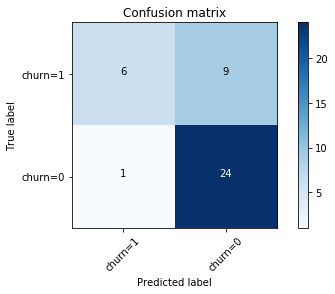

In [87]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

#### Interpretation of Confusion Matrix
Look at first row. The first row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

In [88]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83        25
         1.0       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class.

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

log loss

Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [91]:
# from sklearn.metrics import log_loss
log_loss(y_test, yhat_proba)

0.6017092478101186